In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/Dengue cases csv.csv')
df

,S.NO,Patient ID,IPNO,Patient Name,Age,Year,Gender,Ward,Dateof Admission,Dateof Discharge,DOCNAME,Status,PStreet Name,PArea Name,Finding,Diagnosis,Diagonisis Description
0,1,2967005,202310_001828783,ABIVIGNESHWARA KANAGARAJ,32,YRS,M,D4,10/17/23,10/23/23,VASANTHAN K,RECOVERED,"3/2, 2ND FLOOR, RRC STREET,","REDHILLS,",A90,DENGUE FEVER,NaN
1,2,2872700,202209_001759985,ARYA MUTHU R,7,YRS,M,A3,9/23/22,9/25/22,SARALA PREMKUMAR DR,RECOVERED,F1 SAI ENCLAVE NARAYANA N NAGAR,4 TH STREET KOLAPAKKAM,A90,DENGUE FEVER,NaN
2,3,2289886,201512_001160841,HEMASUNDARI,11,YRS,F,F7,12/26/15,12/28/15,ARUN PRASATH T S DR,RECOVERED,"33, VANIGAR STREET,",-,A90.0,DENGUE WITH WARNING SIGNS,"SHORT STATURE, NOT ELSEWHERE CLASSFIED"
3,4,2272612,201510_001139078,LAKSHMIDHAR D,9,YRS,M,B3,10-09-2015,10-12-2015,LATHA RAVICHANDRAN DR,RECOVERED,"MAYURA APARTMENTS, SRIKALAHASTI","CHENNAI ROAD, CHITTOOR DIST",A90.0,DENGUE WITH WARNING SIGNS,NaN
4,5,21540495,202108_001670602,MAHESHWARAN A,16,YRS,M,NB-PAED,08-09-2021,8/13/21,PADMASANI L N DR,RECOVERED,"NO : 31, 3RD STREET, MOORTHY NAGAR",KATHIRVEDU,A90.0,DENGUE WITH WARNING SIGNS,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12964,12965,2803059,202309_001824929,ZAYAN KHAN,1,YRS,M,B3,9/17/23,9/19/23,VENKATESH KUMAR B DR (PAED),RECOVERED,"NO 8, 2ND ST NEW COLONY",ADAMBAKKAM,A90.0,DENGUE WITH WARNING SIGNS,NaN
12965,12966,2107197,201808_001450668,ZEENA GOPAKUMAR,47,YRS,F,D4,8/30/18,09-03-2018,RAMAKRISHNAN S R,RECOVERED,"KOORA 268, KOOTTANVILA","THIRUVENDRAM,",A90,DENGUE FEVER,NaN
12966,12967,21247277,201812_001480430,ZEENATH A,39,YRS,F,NB-FMW,12-09-2018,12/15/18,SENTHIL N,RECOVERED,"18, VINAYAGA MUTHILI ST,","VANDAVASI,",A90,DENGUE FEVER,PURPURA AND OTHER HAEMORRHAGIC CONDITIONS THRO...
12967,12968,2974683,202311_001832400,ZEENATH AFRIN M,16,YRS,F,B3,11/17/23,11/21/23,VILVANATHAN V DR,RECOVERED,"106 A, THOMAS STREET, GANAPATHI NAGAR,","ALAPAKKAM, PORUR",A90,DENGUE FEVER,NaN


In [12]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/Dengue cases csv.csv')
df
# %%
# Drop the specified columns
df.drop(columns=["S.NO", "Patient ID", "IPNO", "Patient Name"], inplace=True)

# %%
# Check the column names in the DataFrame to verify the drop operation
print(df.columns)

# Based on the output of the above line, correct the list of column names
# to be dropped in the previous cell if necessary.
# The second df.drop() call was removed as it was causing the error.

Index(['Age', 'Year', 'Gender', 'Ward', 'Dateof Admission', 'Dateof Discharge',
       'DOCNAME', 'Status', 'PStreet Name', 'PArea Name', 'Finding ',
       'Diagnosis ', 'Diagonisis Description '],
      dtype='object')


In [13]:
df['Dateof Admission'] = pd.to_datetime(df['Dateof Admission'], errors='coerce', dayfirst=True)
df['Dateof Discharge'] = pd.to_datetime(df['Dateof Discharge'], errors='coerce', dayfirst=True)


<ipython-input-13-a2cf5fc53173>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dateof Admission'] = pd.to_datetime(df['Dateof Admission'], errors='coerce', dayfirst=True)
<ipython-input-13-a2cf5fc53173>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dateof Discharge'] = pd.to_datetime(df['Dateof Discharge'], errors='coerce', dayfirst=True)


In [14]:
df['Length of Stay'] = (df['Dateof Discharge'] - df['Dateof Admission']).dt.days


In [15]:
df.drop(columns=["Dateof Admission", "Dateof Discharge"], inplace=True)


In [16]:
df['Year'] = df['Year'].str.extract('(\d+)').astype(float)


In [25]:
# Show the count of missing values in each column
print(df.isnull().sum())


Age                            0
Year                       12969
Gender                         0
Ward                           0
DOCNAME                        0
Status                         1
PStreet Name                   0
PArea Name                     1
Finding                        0
Diagnosis                      0
Diagonisis Description      6793
Length of Stay                 0
dtype: int64


In [26]:
# Drop rows where the target variable ('Status') is missing
df = df.dropna(subset=['Status'])


In [28]:
# Example: Fill missing numeric column with median
df['Length of Stay'] = df['Length of Stay'].fillna(df['Length of Stay'].median())


<ipython-input-28-7f73ae955d4a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Length of Stay'] = df['Length of Stay'].fillna(df['Length of Stay'].median())


In [29]:
# Drop columns with more than 50% missing data
threshold = len(df) * 0.5
df = df.dropna(axis=1, thresh=threshold)


In [31]:
# Update the categorical_cols list to only include columns that still exist in the DataFrame
# We check which columns from the original list are still present in df.columns
categorical_cols = [col for col in categorical_cols if col in df.columns]

for col in categorical_cols:
    df[col] = df[col].astype(str)
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [34]:
from sklearn.preprocessing import StandardScaler
import pandas as pd # Ensure pandas is imported

# List of numerical columns
numerical_cols = ["Age", "Year", "Length of Stay"]  # example columns

# Update the numerical_cols list to only include columns that still exist in the DataFrame
# We check which columns from the original list are still present in df.columns
numerical_cols = [col for col in numerical_cols if col in df.columns]


# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the numerical features
# Check if there are any numerical columns left before attempting to scale
if numerical_cols:
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
else:
    print("No numerical columns found in the DataFrame to scale.")

In [36]:
from sklearn.preprocessing import MinMaxScaler

# List of numerical columns
numerical_cols = ["Age", "Year", "Length of Stay"]  # example columns

# Update the numerical_cols list to only include columns that still exist in the DataFrame
# We check which columns from the original list are still present in df.columns
numerical_cols = [col for col in numerical_cols if col in df.columns]

# Create a MinMaxScaler instance
minmax_scaler = MinMaxScaler()

# Fit and transform the numerical features
# Check if there are any numerical columns left before attempting to scale
if numerical_cols:
    df[numerical_cols] = minmax_scaler.fit_transform(df[numerical_cols])
else:
    print("No numerical columns found in the DataFrame to scale.")

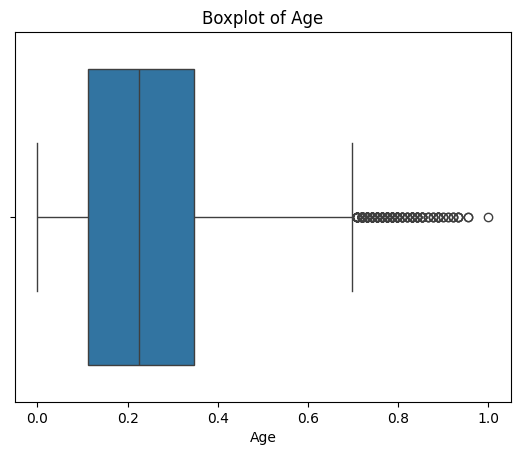

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Boxplot for 'Age'
sns.boxplot(x=df['Age'])
plt.title("Boxplot of Age")
plt.xlabel("Age")
plt.show()


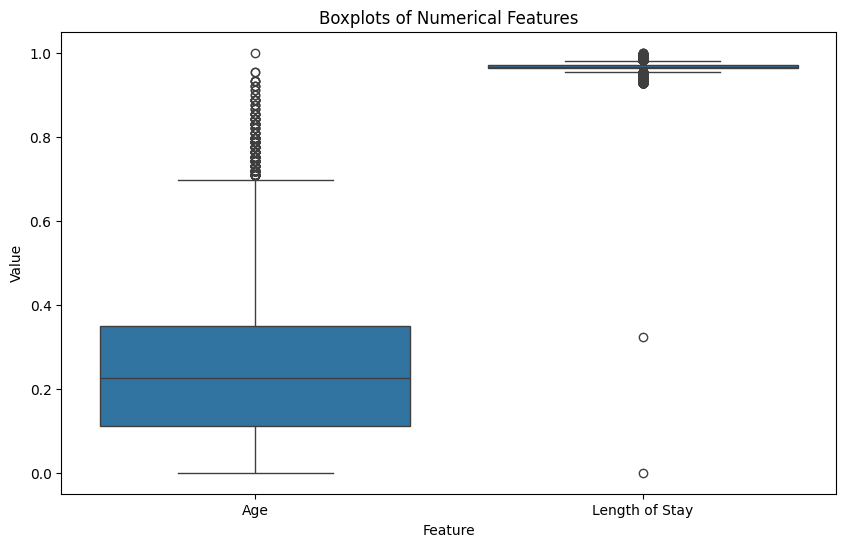

In [39]:
# Select numerical columns (modify list as needed)
numerical_cols = ["Age", "Year", "Length of Stay"]

# Update the numerical_cols list to only include columns that still exist in the DataFrame
# We check which columns from the original list are still present in df.columns
numerical_cols = [col for col in numerical_cols if col in df.columns]

# Melt the dataframe to long format for seaborn
# Only proceed if there are numerical columns left
if numerical_cols:
    df_melted = df[numerical_cols].melt(var_name="Feature", value_name="Value")

    # Create boxplots for all features
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="Feature", y="Value", data=df_melted)
    plt.title("Boxplots of Numerical Features")
    plt.xlabel("Feature")
    plt.ylabel("Value")
    plt.show()
else:
    print("No numerical columns remaining to plot after data cleaning.")

In [41]:
# Define a function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        # Ensure the column still exists before attempting to process
        if col in df.columns:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # Keep only the rows within the bounds for the current column
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        else:
            print(f"Warning: Column '{col}' not found in the DataFrame. Skipping outlier removal for this column.")
    return df

# Example usage:
# Define the original list of numerical columns
original_numerical_cols = ['Age', 'Year', 'Length of Stay']

# Update the list to only include columns that still exist in the DataFrame `df`
numerical_cols_for_outliers = [col for col in original_numerical_cols if col in df.columns]

# Pass the updated list to the function
if numerical_cols_for_outliers:
    df_cleaned = remove_outliers_iqr(df.copy(), numerical_cols_for_outliers) # Use a copy to avoid modifying the original df if needed later
else:
    print("No numerical columns remaining to perform outlier removal.")

# Optionally, you can print the columns of df_cleaned to verify
# print(df_cleaned.columns)

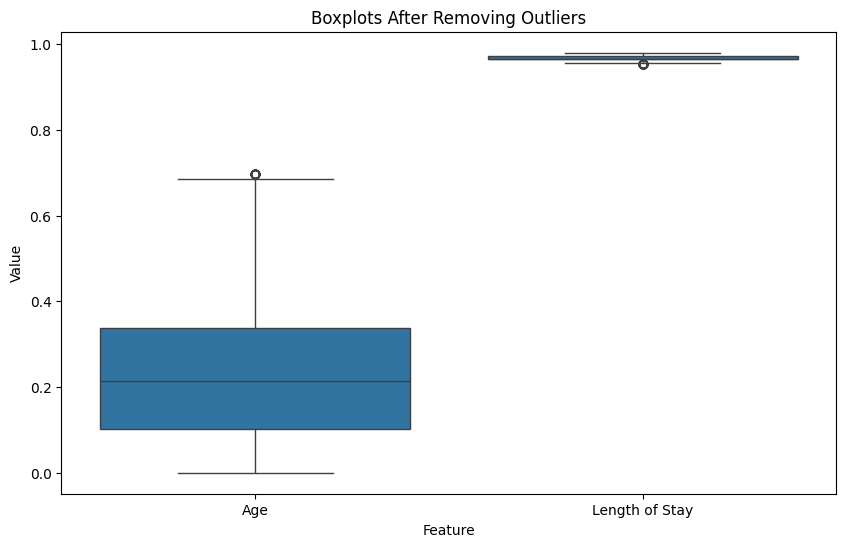

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Ensure pandas is imported

# Melt data for boxplot
# Get the list of numerical columns that are actually present in df_cleaned
numerical_cols_in_df_cleaned = [col for col in numerical_cols if col in df_cleaned.columns]

# Only proceed if there are numerical columns left in df_cleaned
if numerical_cols_in_df_cleaned:
    df_melted = df_cleaned[numerical_cols_in_df_cleaned].melt(var_name="Feature", value_name="Value")

    # Draw boxplots
    plt.figure(figsize=(10, 6))
    sns.boxplot(x="Feature", y="Value", data=df_melted)
    plt.title("Boxplots After Removing Outliers")
    plt.xlabel("Feature")
    plt.ylabel("Value")
    plt.show()
else:
    print("No numerical columns remaining in df_cleaned to plot after outlier removal.")

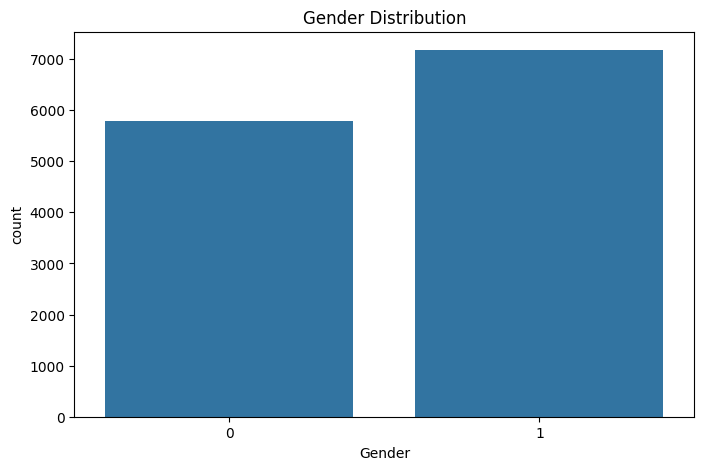

In [47]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()


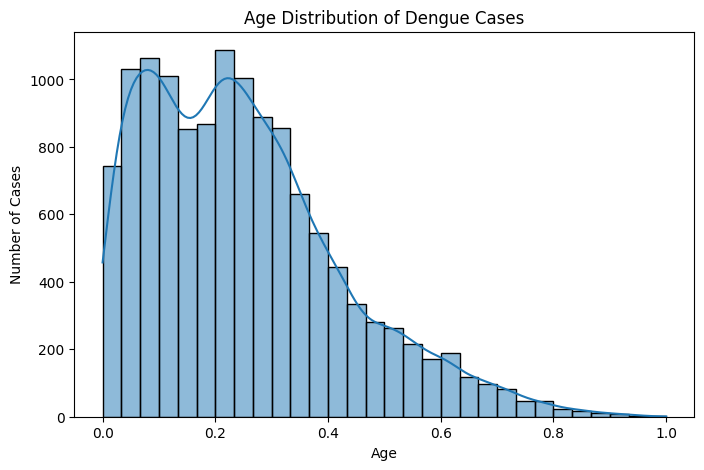

In [51]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution of Dengue Cases")
plt.xlabel("Age")
plt.ylabel("Number of Cases")
plt.show()


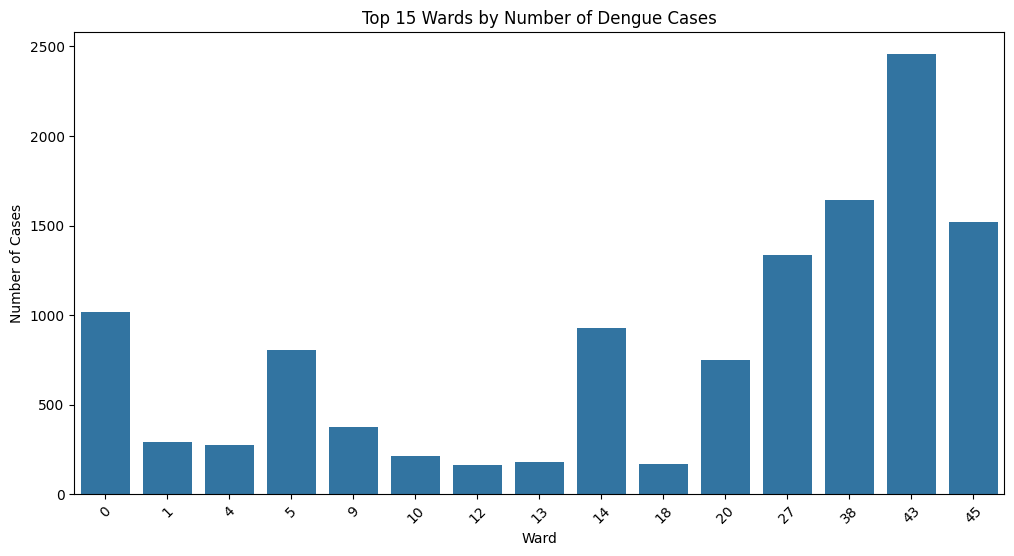

In [52]:
plt.figure(figsize=(12,6))
cases_by_area = df['Ward'].value_counts().sort_values(ascending=False).head(15)
sns.barplot(x=cases_by_area.index, y=cases_by_area.values)
plt.title("Top 15 Wards by Number of Dengue Cases")
plt.xticks(rotation=45)
plt.xlabel("Ward")
plt.ylabel("Number of Cases")
plt.show()


In [72]:
# Save preprocessed data to CSV
df_cleaned.to_csv("dengue_preprocessed.csv", index=False)


In [73]:
df

,Age,Year,Gender,Ward,DOCNAME,Status,PStreet Name,PArea Name,Finding,Diagnosis,Length of Stay,Month
0,0.348315,1.000000,1,13,95,4,1270,5755,A90,DENGUE FEVER,0.965178,0.818182
1,0.067416,0.888889,1,0,65,4,3016,375,A90,DENGUE FEVER,0.964715,0.727273
2,0.112360,0.111111,0,27,5,4,1404,137,A90.0,DENGUE WITH WARNING SIGNS,0.964715,1.000000
3,0.089888,0.111111,1,5,31,4,3590,1453,A90.0,DENGUE WITH WARNING SIGNS,0.975012,0.727273
4,0.168539,0.777778,1,48,41,4,6906,2861,A90.0,DENGUE WITH WARNING SIGNS,0.961476,0.727273
...,...,...,...,...,...,...,...,...,...,...,...,...
12964,0.000000,1.000000,1,5,98,4,6648,519,A90.0,DENGUE WITH WARNING SIGNS,0.964715,0.727273
12965,0.516854,0.444444,0,13,58,4,3475,6949,A90,DENGUE FEVER,0.944354,0.636364
12966,0.426966,0.444444,0,33,70,4,697,7383,A90,DENGUE FEVER,0.975359,0.727273
12967,0.168539,1.000000,0,5,99,4,292,607,A90,DENGUE FEVER,0.964947,0.909091


In [75]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Print the columns of df_cleaned to check if 'Finding' exists
print(df_cleaned.columns)

# If 'Finding' is not in the printed list, you need to adjust your data cleaning steps
# to ensure 'Finding' is not dropped, or choose a different column to encode.

# Only attempt to encode if 'Finding' is in the DataFrame
if 'Finding' in df_cleaned.columns:
    df_cleaned['Finding_encoded'] = le.fit_transform(df_cleaned['Finding'])
else:
    print("The column 'Finding' does not exist in df_cleaned. Cannot encode.")

Index(['Age', 'Year', 'Gender', 'Ward', 'DOCNAME', 'Status', 'PStreet Name',
       'PArea Name', 'Finding ', 'Diagnosis ', 'Length of Stay', 'Month'],
      dtype='object')
The column 'Finding' does not exist in df_cleaned. Cannot encode.


In [79]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Check if 'Diagonisis' column exists before attempting to encode
if 'Diagonisis' in df_cleaned.columns:
    df_cleaned['Diagonisis_encoded'] = le.fit_transform(df_cleaned['Diagonisis'])
else:
    print("The column 'Diagnosis' does not exist in df_cleaned. Cannot encode.")

The column 'Diagnosis' does not exist in df_cleaned. Cannot encode.
